<a href="https://colab.research.google.com/github/Asifbbl/HEALTH-INSURENCE-GROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_GROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

::# **Project Name    -  HEALTH INSURANCE CROSS SELL PREDICTION**




##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** - Asif Ansari
##### **Team Member 2 -** - Zubair  Ahmad

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

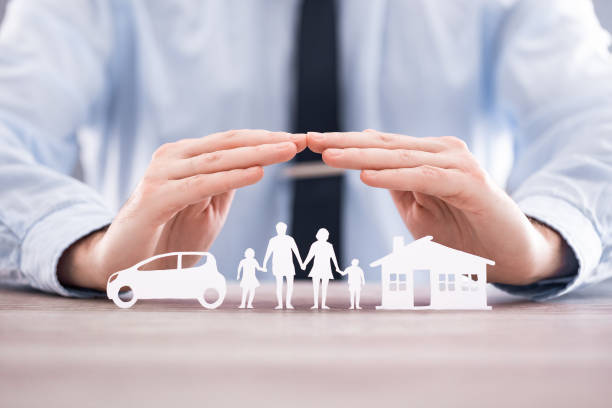

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting of drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path =('/content/drive/MyDrive/Health Insurence Predection/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
dataset=pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('Number of (rows, columns) are',dataset.shape)

Number of (rows, columns) are (381109, 12)


### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
dataset.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

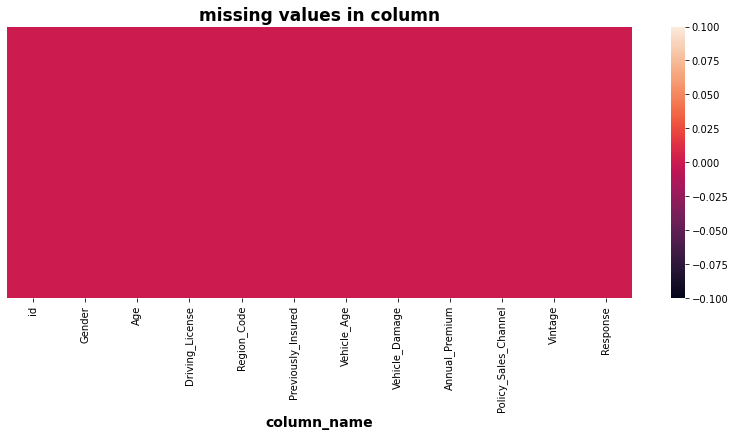

In [9]:
# Visualizing the missing values
dataset.isnull().sum()
plt.figure(figsize=(14, 5))
sns.heatmap(dataset.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

Till now we get to know the following points about our dataset:
1. **'TRAIN-HEALTH INSURANCE CROSS SELL PREDICTIONa'** is having **381109 rows and 12 columns** and does not have any null value.

2. There are **no duplicate** values present in both the datasets.

3. There is no null value persent in the dataset.

4. There are total 4 Numeric and 5 categorical independent feature and dependent feature is numeric column.

The dataset given is a dataset from Health Insurence industry, and we have to analysis the Response of customers and the insights behind it.

Prediction of Response is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand the region behind their Response of costumer.

Till now we got to know the following point about our dataset:


*   Dataset has 381109 rows and 12 columns 
*   No Null value
*   No Duplicate values
*   No missing values
*   columns have 4 Numerical and 5 categorical feature

## ***2. Understanding Your Variables***

In [5]:
# Dataset 
dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
# Dataset Describe
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109.0,NaN,NaN,NaN,190555.0,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109.0,NaN,NaN,NaN,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,NaN,NaN,NaN,0.997869,0.04611,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,NaN,NaN,NaN,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,NaN,NaN,NaN,0.45821,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109.0,NaN,NaN,NaN,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,NaN,NaN,NaN,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


### Variables Description 

TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv - Historical data include data of Health Insurence gross sell 

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. Policy_Sales_Channel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [12]:
# Check Unique Values from every columns.
dataset.nunique()


id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [13]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"The Unique Values of', {i}, 'are:", dataset[i].unique())
  print()
  print('--'*50)
  print()

The Unique Values of', id, 'are: [     1      2      3 ... 381107 381108 381109]

----------------------------------------------------------------------------------------------------

The Unique Values of', Gender, 'are: ['Male' 'Female']

----------------------------------------------------------------------------------------------------

The Unique Values of', Age, 'are: [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

----------------------------------------------------------------------------------------------------

The Unique Values of', Driving_License, 'are: [1 0]

----------------------------------------------------------------------------------------------------

The Unique Values of', Region_Code, 'are: [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 

## 3. ***Data Wrangling***

Data wrangling is the process of removing errors and combining complex data sets to make them more accessible and easier to analyze. Due to the rapid expansion of the amount of data and data sources available today, storing and organizing large quantities of data for analysis is becoming increasingly necessary

### Data Wrangling Code

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
dataset.drop(['id'] , axis=1, inplace= True)

In [8]:
def convert_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')
    
convert_numerical_to_categorical(dataset)

In [8]:
dataset.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_Group'],
      dtype='object')

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

*******************************************************
Number of Male and Female from in the given Dataset
Male      206089
Female    175020
Name: Gender, dtype: int64
*******************************************************


Text(0.5, 1.0, 'Response V/S Gender')

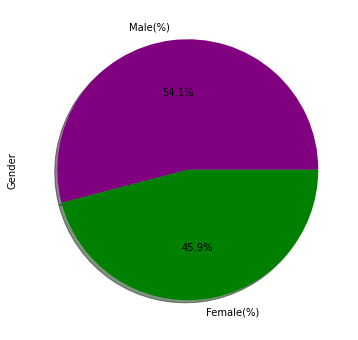

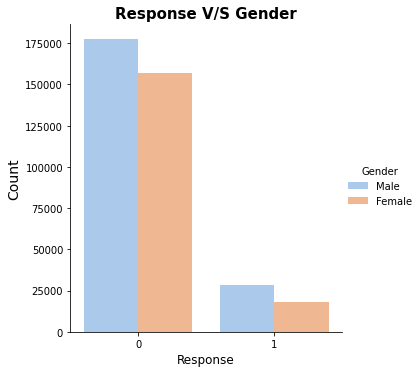

In [9]:
# Chart - 1 visualization code

print('*'*55)
print('Number of Male and Female from in the given Dataset')
print(dataset['Gender'].value_counts())

print('*'*55)
# Distribution of Gender through Pie plot 

dataset['Gender'].value_counts().plot(kind='pie',figsize=(15,6), autopct="%1.1f%%", startangle=360,shadow=True,
                               labels=['Male(%)','Female(%)'], colors=['purple','green'],explode=[0,0])

# Gender and responce Relationship

sns.catplot(x="Response", hue="Gender", kind="count",palette="pastel",data=dataset)
plt.xlabel('Response', fontdict={'fontsize':12})
plt.ylabel('Count',fontdict={'fontsize': 14})
plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})

##### 1. Why did you pick the specific chart?

We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above pie chart I got to know that, there are 206089 of them are  which is 54.1% of them are Male category and 175020 of them  which 45.9% are feamale category from total number of given dataset. 

These shows that male category is quite high as compare to Feamle.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Relationship Between Age and Responce 

Text(0.5, 1.0, 'Response V/S Age_Group')

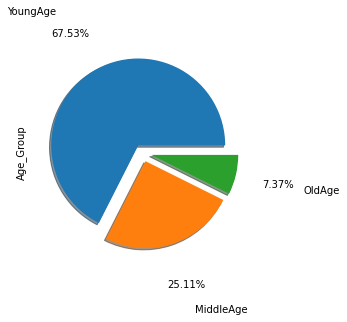

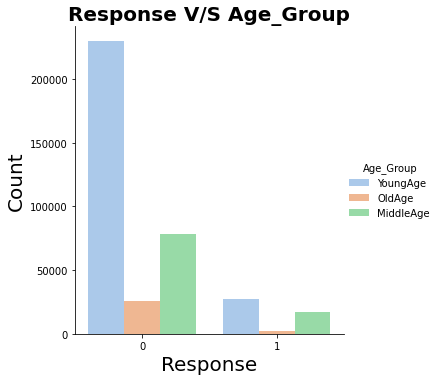

In [ ]:
# Chart - 2 visualization code

#Distribution of age group through pieplot

dataset['Age_Group'].value_counts().plot(kind='pie', explode= (0.1,0.1,0.1), shadow=True, autopct='%1.2f%%', pctdistance=1.5, labeldistance=1.8)


sns.catplot(x="Response", hue="Age_Group", kind="count",palette="pastel",data=dataset)
plt.xlabel('Response', fontdict={'fontsize':20})
plt.ylabel('Count',fontdict={'fontsize': 20})
plt.title('Response V/S Age_Group', fontdict={'fontsize': 20, 'fontweight':'bold'})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

*******************************************************
How many of them have Driving Liscense
1    380297
0       812
Name: Driving_License, dtype: int64
*******************************************************


Text(0.5, 1.0, 'Response V/S Driving License')

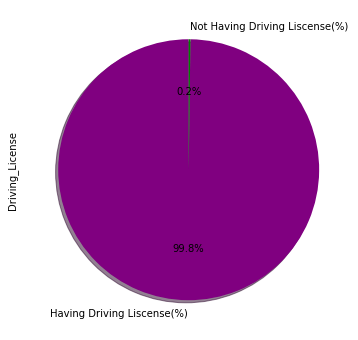

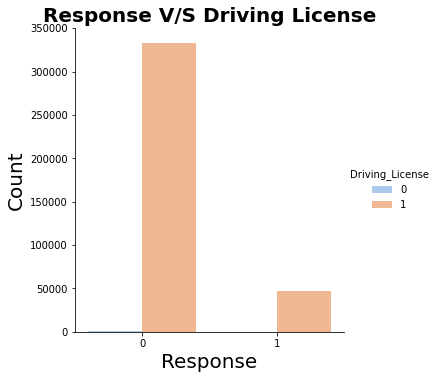

In [ ]:
# Chart - 3 visualization code

print('*'*55)
print('How many of them have Driving Liscense')
print(dataset['Driving_License'].value_counts())


# Distribution of Driving License through pieplot
print('*'*55)
dataset['Driving_License'].value_counts().plot(kind='pie', figsize=(15,6), autopct="%1.1f%%", startangle=90,shadow=True,
                               labels=['Having Driving Liscense(%)','Not Having Driving Liscense(%)'], 
                               colors=['purple','green'], explode=[0,0])


sns.catplot(x="Response", hue="Driving_License", kind="count",palette="pastel",data=dataset)
plt.xlabel('Response', fontdict={'fontsize':20})
plt.ylabel('Count',fontdict={'fontsize': 20})
plt.title('Response V/S Driving License', fontdict={'fontsize': 20, 'fontweight':'bold'})

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

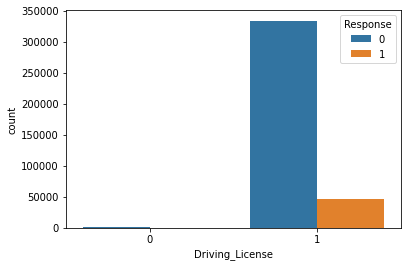

In [ ]:
sns.countplot(dataset['Driving_License'],hue=dataset['Response'])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

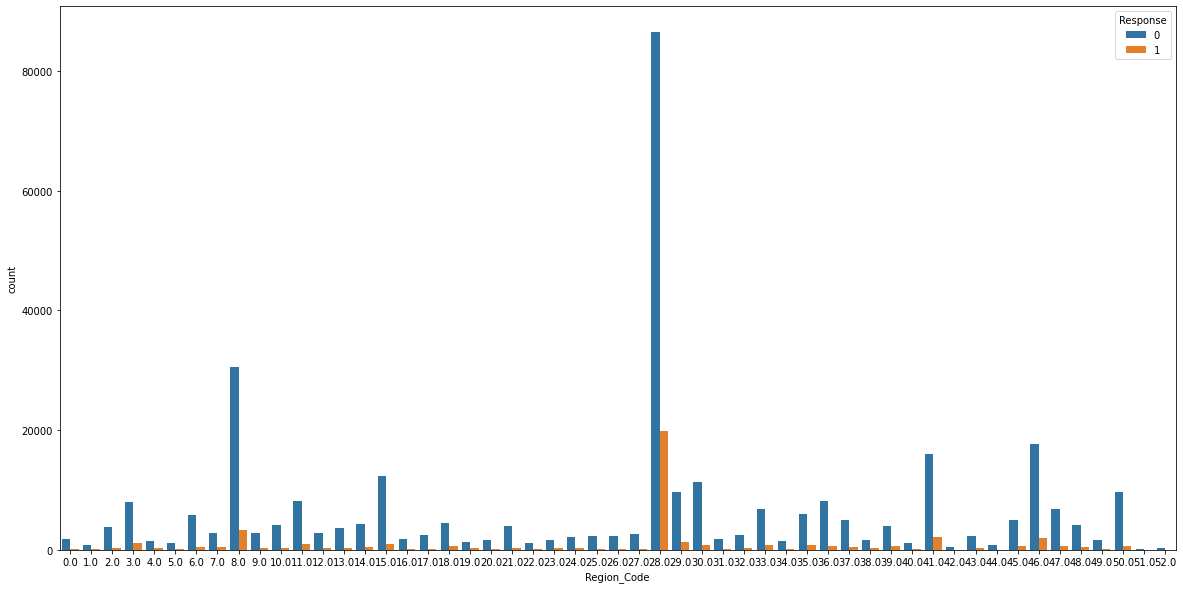

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(20,10))
sns.countplot(x='Region_Code',hue='Response',data=dataset)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

*******************************************************
How many of them have  Previously Insurenced
0    206481
1    174628
Name: Previously_Insured, dtype: int64
**************************************************


<AxesSubplot:ylabel='Previously_Insured'>

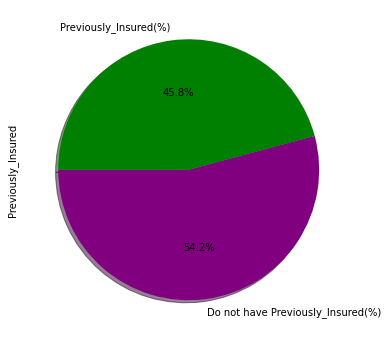

In [ ]:
# Chart - 5 visualization code

# Dependant Column Value Counts
print('*'*55)
print('How many of them have  Previously Insurenced')
print(dataset['Previously_Insured'].value_counts())

# Dependant Variable Column Visualization
print('*'*50)
dataset['Previously_Insured'].value_counts().plot(kind='pie', figsize=(15,6), autopct="%1.1f%%", startangle=180, shadow=True,
                               labels=['Do not have Previously_Insured(%)','Previously_Insured(%)'],
                               colors=['purple','green'],explode=[0,0])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


<AxesSubplot:ylabel='Vehicle_Damage'>

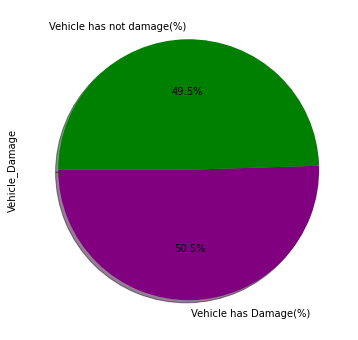

In [ ]:
# Chart - 6 visualization code

# Dependant Column Value Counts
print(dataset['Vehicle_Damage'].value_counts())
# Dependant Variable Column Visualization
dataset['Vehicle_Damage'].value_counts().plot(kind='pie',
                               figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=180,
                               shadow=True,
                               labels=['Vehicle has Damage(%)','Vehicle has not damage(%)'],
                               colors=['purple','green'],
                               explode=[0,0]
                              )

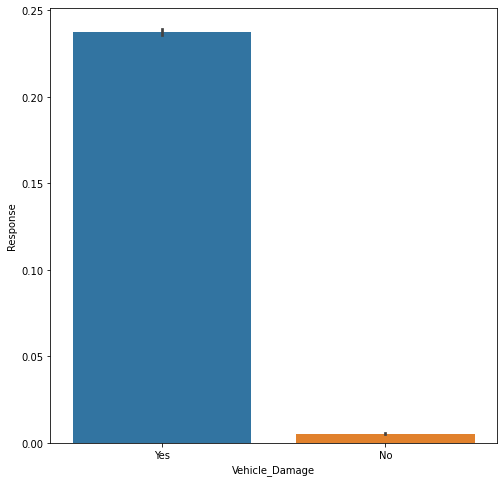

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,8))
sns.barplot(x='Vehicle_Damage', y='Response', data=dataset)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

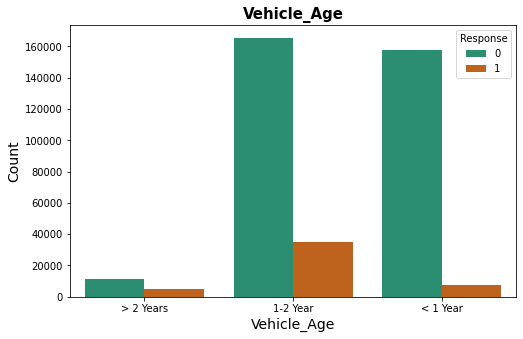

In [ ]:
# Chart - 7 visualization code

def vehicle_age_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="Dark2")
    plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})


vehicle_age_distribution(dataset)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
dataset['Annual_Premium'].unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  Age_Group             381109 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 37.8+ MB


In [ ]:
dataset.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
Age_Group                    3
dtype: int64

In [ ]:
# Numeric Features

numeric_features= dataset.select_dtypes(exclude='object')
numeric_features

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0
381105,381106,30,1,37.0,1,40016.0,152.0,131,0
381106,381107,21,1,30.0,1,35118.0,160.0,161,0
381107,381108,68,1,14.0,0,44617.0,124.0,74,0


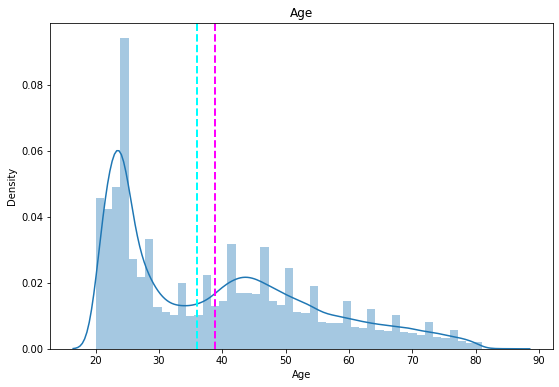

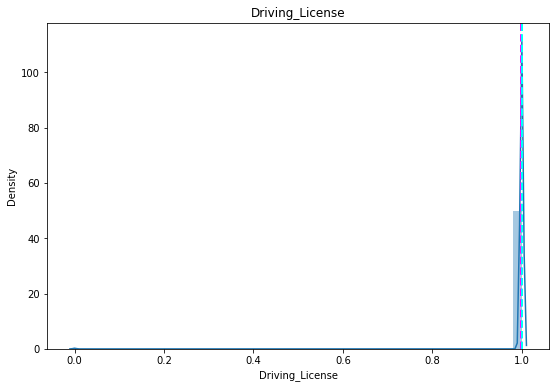

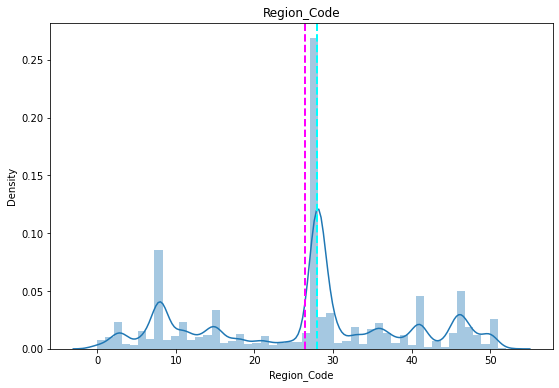

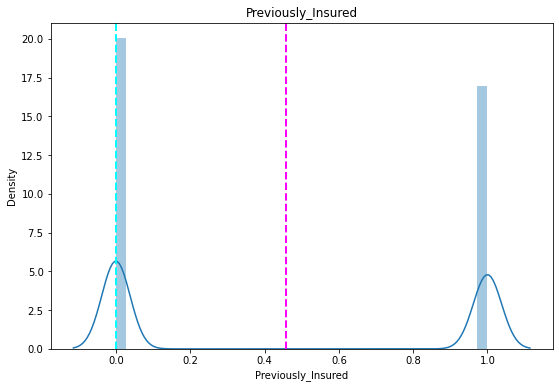

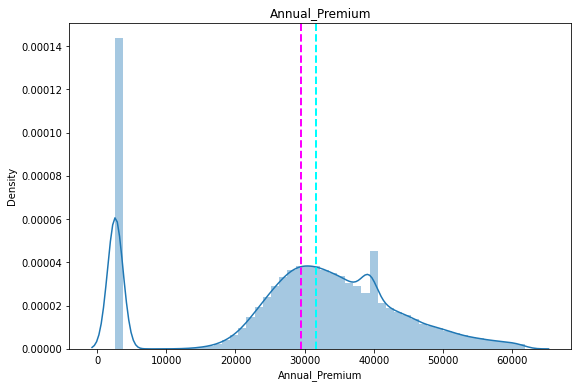

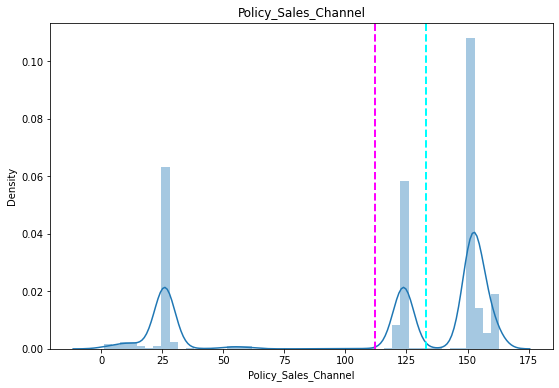

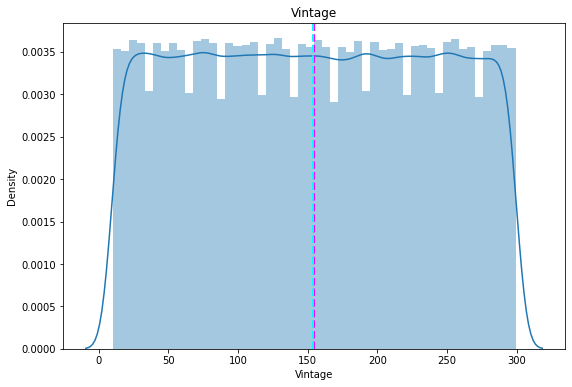

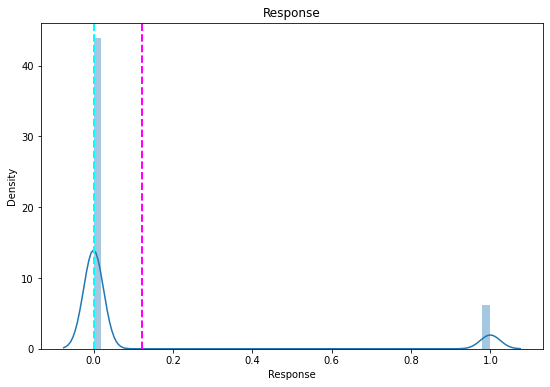

In [ ]:
# Chart - 9 visualization code
# Visualizing code of hist plot for each columns to know the data distibution
for col in dataset.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()


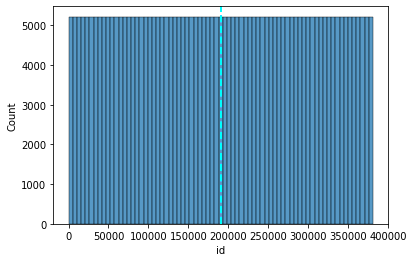

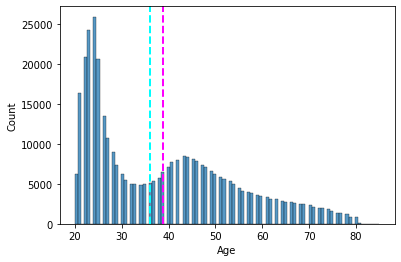

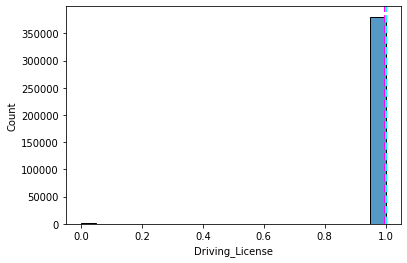

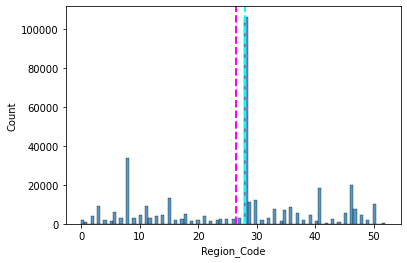

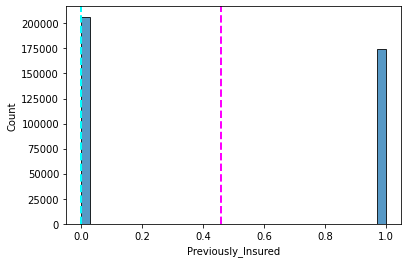

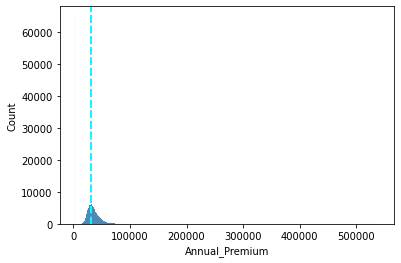

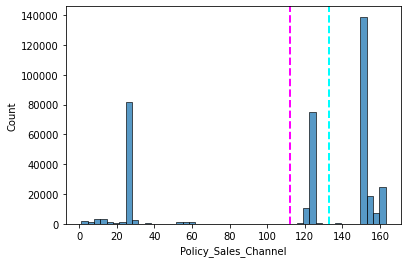

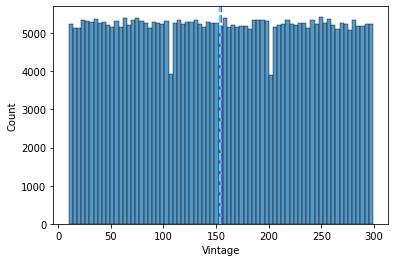

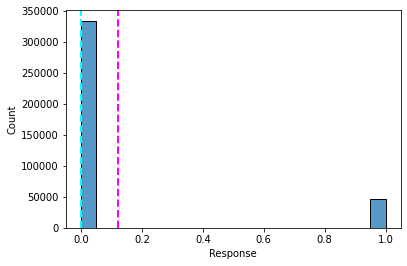

In [ ]:
for col in numeric_features[:]:
  sns.histplot(dataset[col])
  plt.axvline(dataset[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(dataset[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_Group'],
      dtype='object')

#### Chart - 14 - Correlation Heatmap

In [ ]:
sns.heatmap(dataset.corr(), fmt ='.2g')

In [11]:
dataset.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_Group'],
      dtype='object')

<AxesSubplot:>

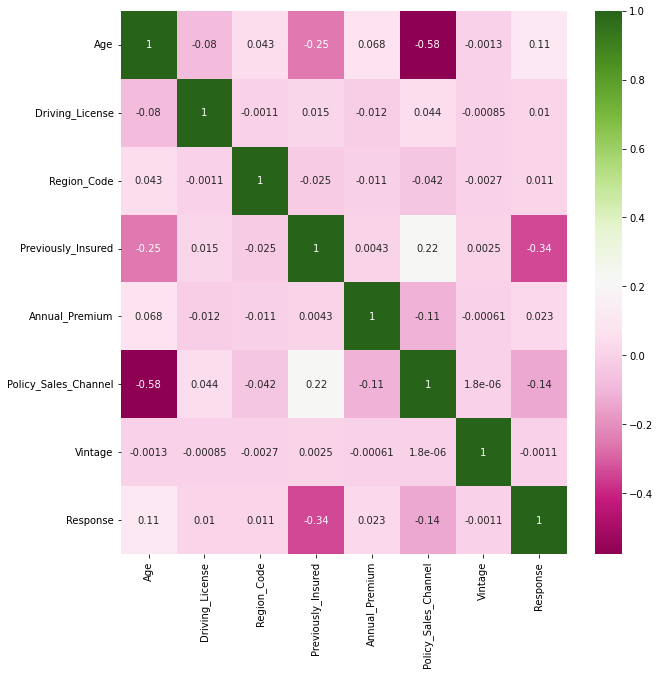

In [10]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap ='PiYG', annot = True)

##### 1. Why did you pick the specific chart?

  **Answer.** We have pick up this heatmap chart to find insights to analyse that how the given one variable are the corelation to another variable.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** From the heat map we can say that no any variable is corelated to any one so the variable of the data which is provided so we can implement the algorithms without dealing with the corelation.

#### Chart - 15 - Pair Plot 

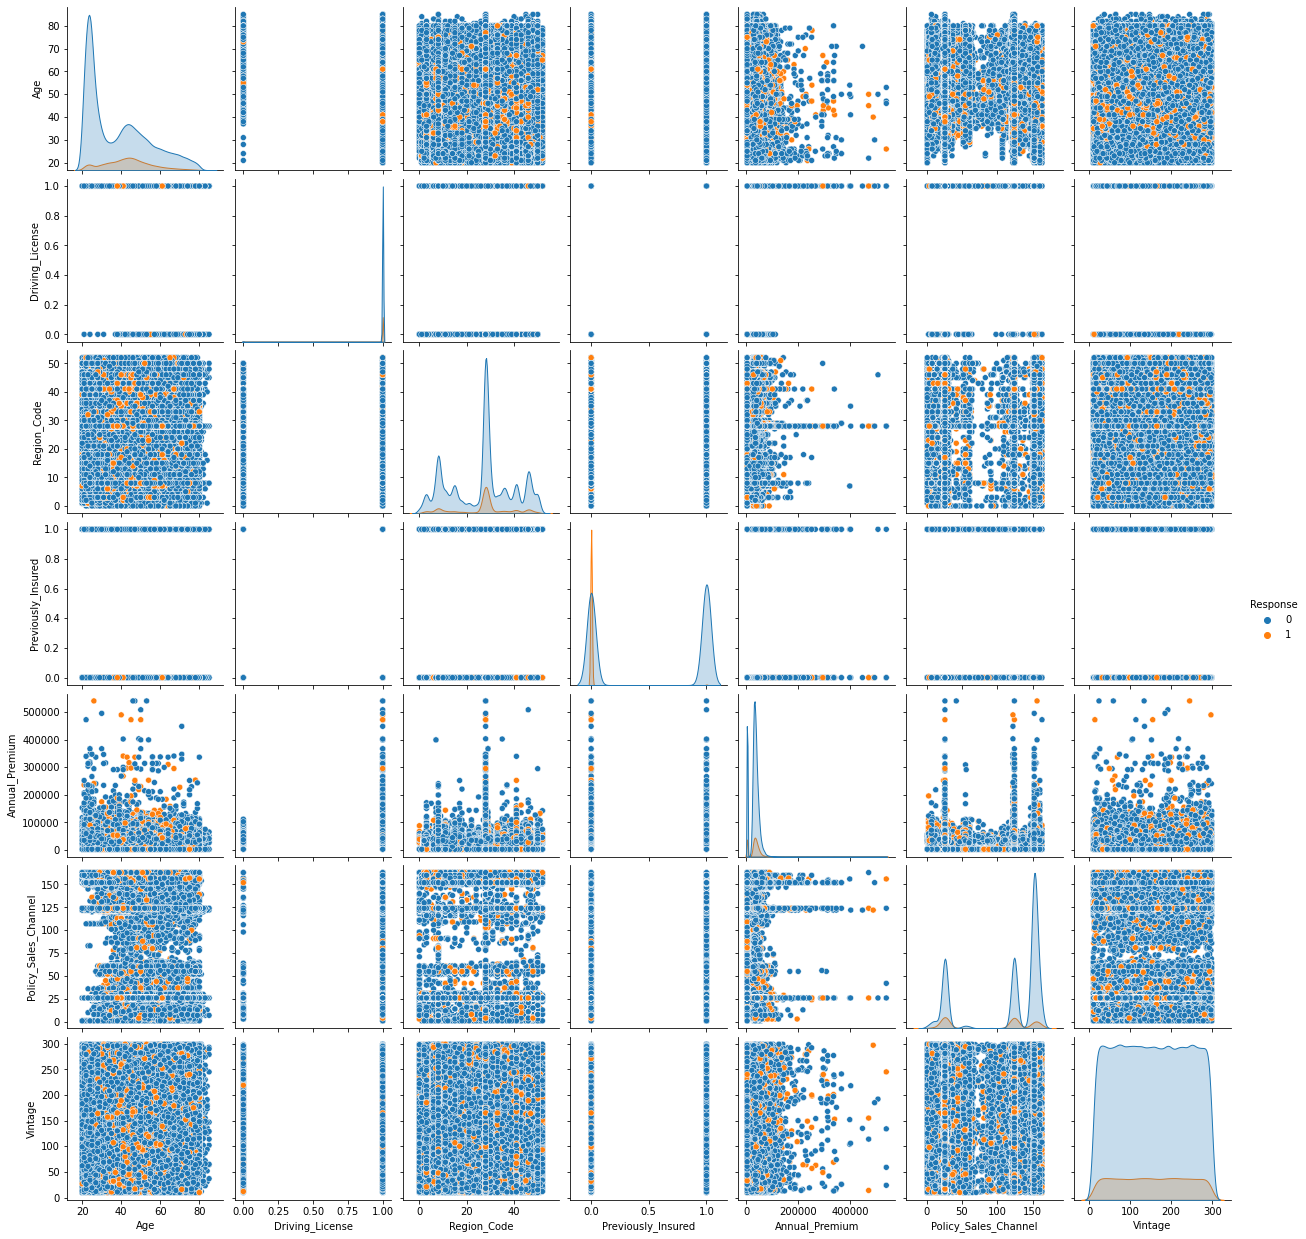

In [19]:
# Pair Plot visualization code
sns.pairplot(dataset,hue='Response')

##### 1. Why did you pick the specific chart?

**Answer :** Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** From the above chart I got to know, there are less linear relationship between variables and data points aren't linearly separable

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Following shows the number of Missing values persent in the dataset 
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Age_Group               0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing values through figure


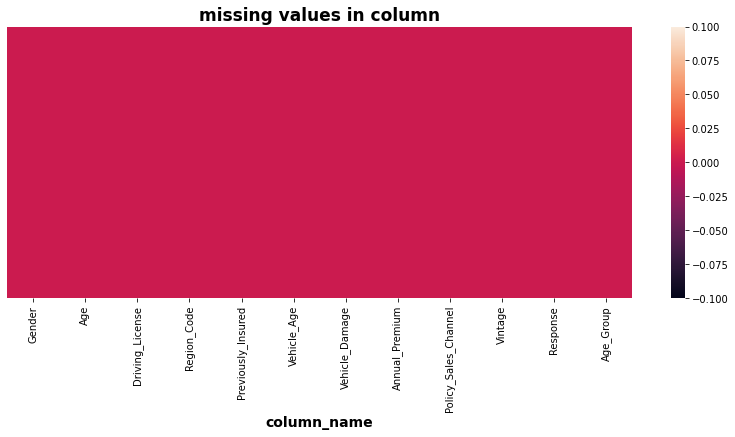

In [20]:
# Handling Missing Values & Missing Value Imputation
print('Following shows the number of Missing values persent in the dataset ')
print(dataset.isnull().sum())
print('--'*50)
print('Missing values through figure')
plt.figure(figsize=(14, 5))
sns.heatmap(dataset.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we can see that there is no null value persent into it therefore there is not a reguirement to handle missing value and null value of the data.

When we are working with large set of data then there is chance that missing value persent into it so we have to handle error and following are the techenique to handle missing value--



1.   Deleting Rows with missing values

2.   Impute missing values for continuous variable

3.   Using Algorithms that support missing values

4.   Prediction of missing values

5.   Imputation using Deep Learning Library 



### 2. Handling Outliers

In [10]:
# defining the code for outlier detection and percentage using IQR.
def find_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

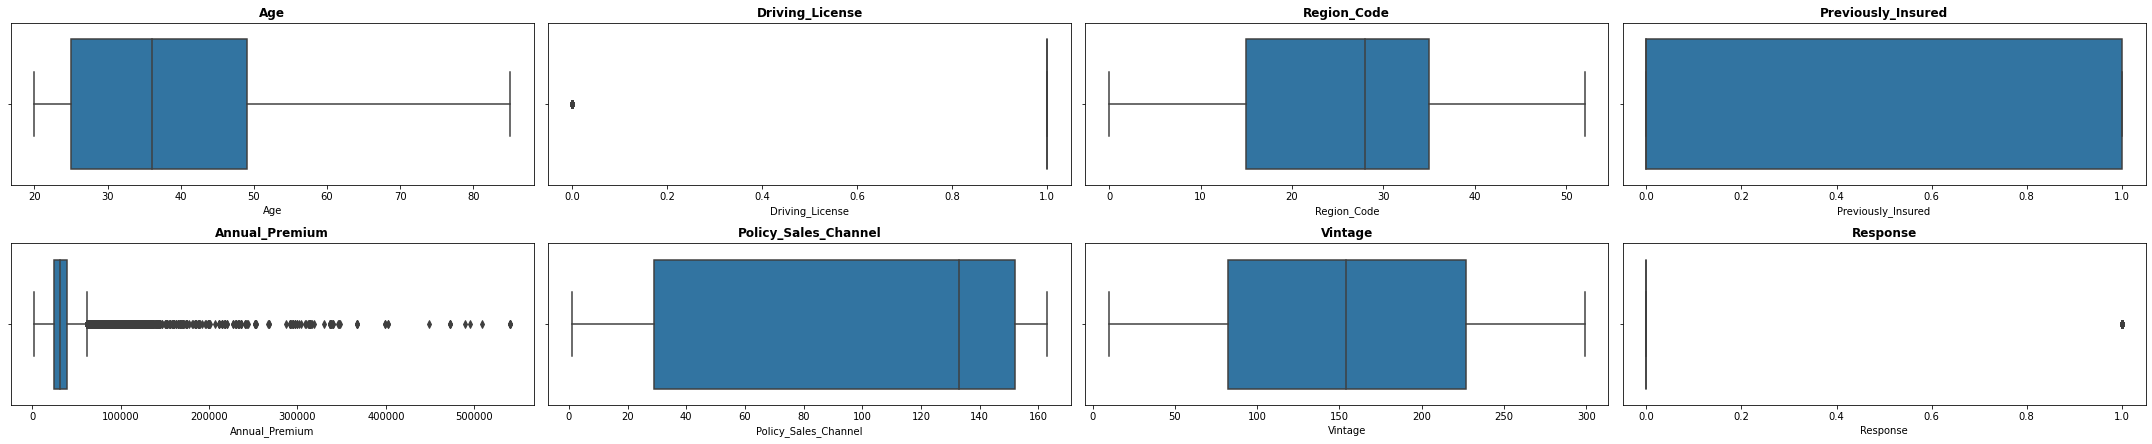

In [11]:
# code to find outliers
def showoutliers(data):
  plt.figure(figsize=(30,15))
  for n,column in enumerate(data.describe().columns):
    plt.subplot(5, 4, n+1)
    sns.boxplot(data[column])
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
  

showoutliers(dataset)

In [12]:
#Define variable 
continuous_variable = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Age']
categorical_variable = [ 'Driving_License','Previously_Insured','Vintage', 'Response']
object_data= ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Age_Group']

In [13]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continuous_variable:
  print('--'*50)
  print('** Percentage of outliers of continuous variable of columns **')
  print(feature,":")
  find_outliers(dataset[feature])
  print("\n")

----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns **
Region_Code :
q1:15.0, q2:28.0, q3:35.0
Lower bound: -15.0, Upper bound: 65.0, IQR: 20.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns **
Annual_Premium :
q1:24405.0, q2:31669.0, q3:39400.0
Lower bound: 1912.5, Upper bound: 61892.5, IQR: 14995.0
Total number of outliers are: 10320
Total percentage of outlier is: 2.71 %


----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns **
Policy_Sales_Channel :
q1:29.0, q2:133.0, q3:152.0
Lower bound: -155.5, Upper bound: 336.5, IQR: 123.0
Total number of outliers are: 0
Total percentage of outlier

In [14]:
# Handling Outliers & Outlier treatments
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [15]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continuous_variable:
  dataset[feature]= treat_outliers_iqr(dataset[feature])

  
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature a
for feature in continuous_variable:
  print('--'*50)
  print('** After treating outlierrs the percentage of outliers are : **')
  print(feature,":")
  find_outliers(dataset[feature])
  print("\n")

----------------------------------------------------------------------------------------------------
** After treating outlierrs the percentage of outliers are : **
Region_Code :
q1:15.0, q2:28.0, q3:35.0
Lower bound: -15.0, Upper bound: 65.0, IQR: 20.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


----------------------------------------------------------------------------------------------------
** After treating outlierrs the percentage of outliers are : **
Annual_Premium :
q1:24405.0, q2:31669.0, q3:39400.0
Lower bound: 1912.5, Upper bound: 61892.5, IQR: 14995.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


----------------------------------------------------------------------------------------------------
** After treating outlierrs the percentage of outliers are : **
Policy_Sales_Channel :
q1:29.0, q2:133.0, q3:152.0
Lower bound: -155.5, Upper bound: 336.5, IQR: 123.0
Total number of outliers are: 0
Total percentage of outlier i

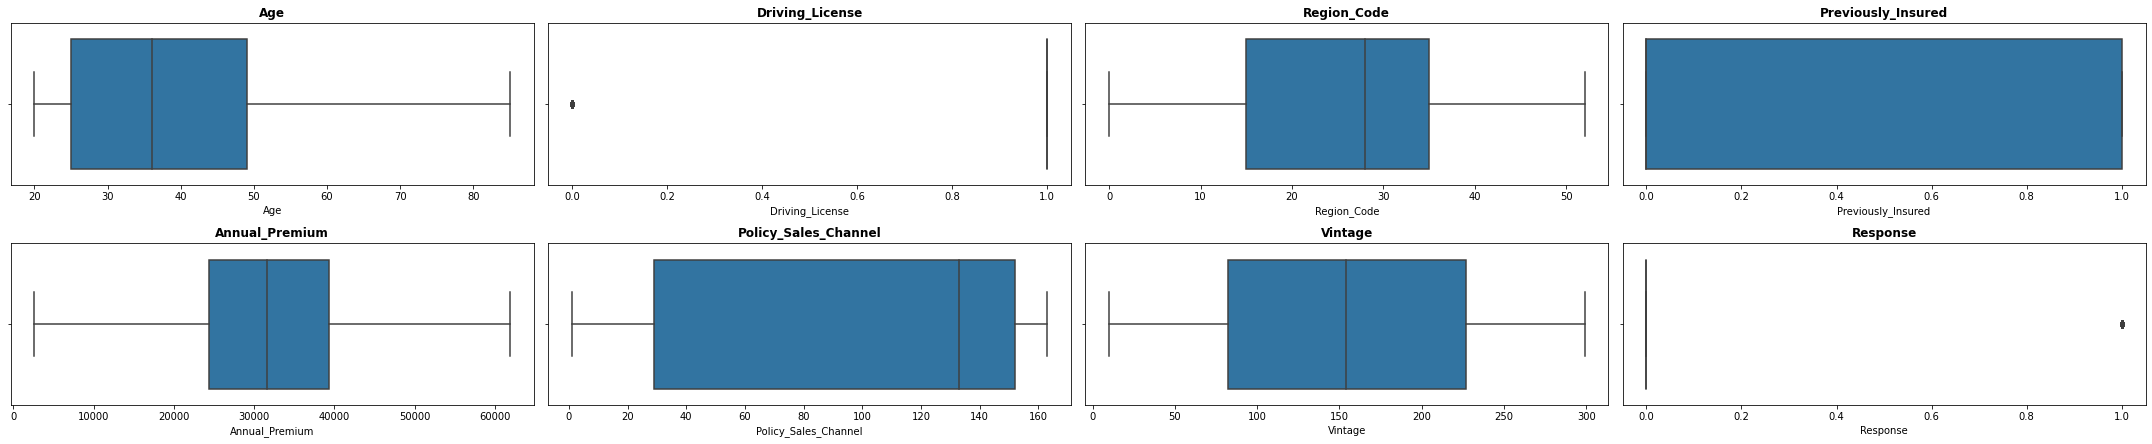

In [16]:
plt.figure(figsize=(30,15))
for n,column in enumerate(dataset.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [17]:
df = dataset.copy()

In [18]:
df.drop('Age', axis=1, inplace= True)

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Damage'] = label_encoder.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age'] = label_encoder.fit_transform(df['Vehicle_Age'])
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])
df.head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,1,28,0,2,1,40454,26,217,1,2
1,1,1,3,0,0,0,33536,26,183,0,1
2,1,1,28,0,2,1,38294,26,27,1,0
3,1,1,11,1,1,0,28619,152,203,0,2
4,0,1,41,1,1,0,27496,152,39,0,2


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

<AxesSubplot:>

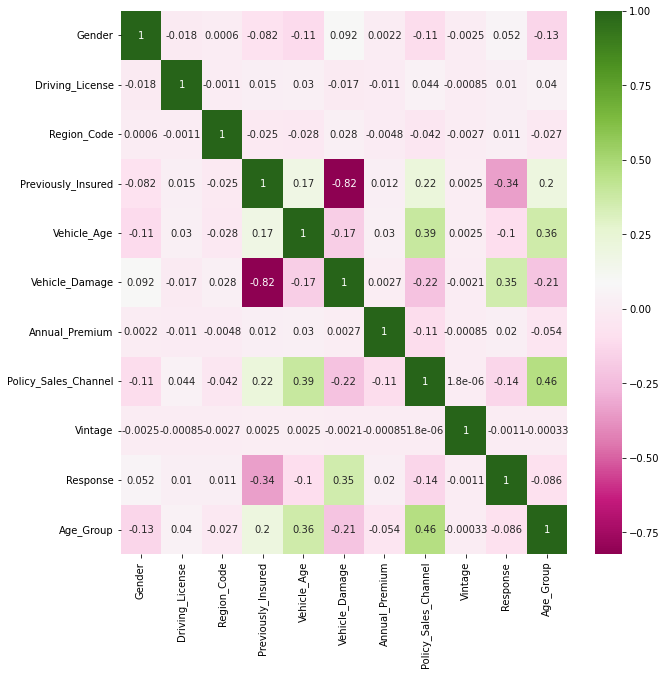

In [20]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap ='PiYG', annot = True)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
calc_vif(df[[i for i in df.describe().columns ]])

,variables,VIF
0,Gender,2.227598
1,Driving_License,30.009085
2,Region_Code,4.947654
3,Previously_Insured,5.740224
4,Vehicle_Age,2.265689
5,Vehicle_Damage,6.340760
6,Annual_Premium,5.121858
7,Policy_Sales_Channel,7.454875
8,Vintage,4.371937
9,Response,1.322142


In [27]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['Driving_License']]])

,variables,VIF
0,Gender,2.111245
1,Region_Code,4.301400
2,Previously_Insured,4.308428
3,Vehicle_Age,2.264612
4,Vehicle_Damage,4.447210
5,Annual_Premium,4.363049
6,Policy_Sales_Channel,6.641869
7,Vintage,3.925611
8,Response,1.316288
9,Age_Group,4.890100


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [29]:
# Scaling your data
x = df.drop(columns='Response',axis =1)
y= df['Response']

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In [33]:
df.drop(['Driving_License'],axis =1,inplace=True)

### 8. Data Splitting

In [36]:
# Split your data to train and test. Choose Splitting ratio wisely.
x= df.drop(columns='Response',axis=1)
y= df[['Response']]

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

Check the given data is balanced or not
----------------------------------------------------------------------------------------------------


0    334399
1     46710
Name: Response, dtype: int64

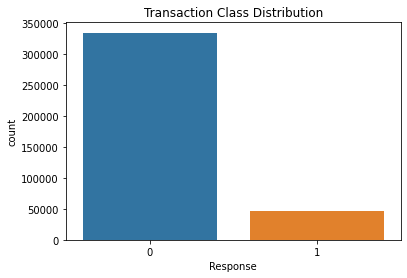

In [37]:
# Handling Imbalanced Dataset
print('Check the given data is balanced or not') 

print('--'*50)
plt.title("Response class Distribution")
sns.countplot(df['Response'])
plt.title("Transaction Class Distribution")
df['Response'].value_counts()

In [38]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the data
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_sm, y_sm = smote.fit_resample(x, y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_sm,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
Response
0           334399
1            46710
dtype: int64 

After Handling Class Imbalace:
Response
0           334399
1           334399
dtype: int64 



In [47]:
# Respliting the dataset after using SMOTE
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_sm,y_sm , test_size = 0.2, random_state = 0) 


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [61]:


model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

ValueError: ignored

In [53]:
from sklearn.metrics import classification_report

In [54]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Finding best parameters
  try:
    print(f"The best parameters are: {model.best_params_}")
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Classification Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act, y_pred=pred)
    sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  plt.show()

  return model

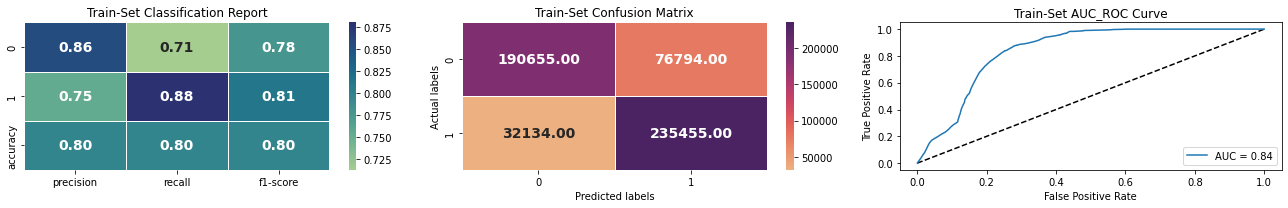

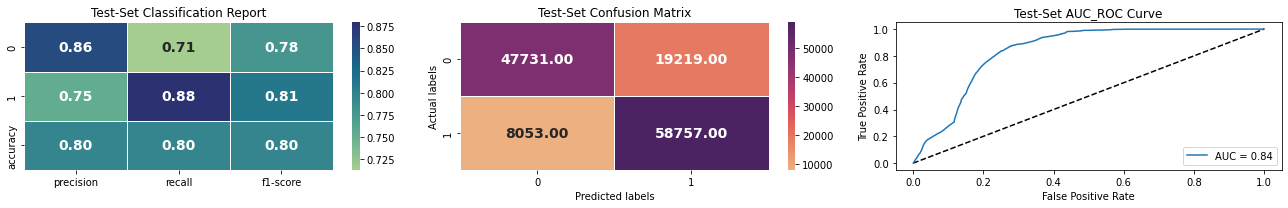

LogisticRegression(max_iter=20000, random_state=0)

In [55]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000,random_state=0)

# Predict on the model
analyse_model(logistic_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

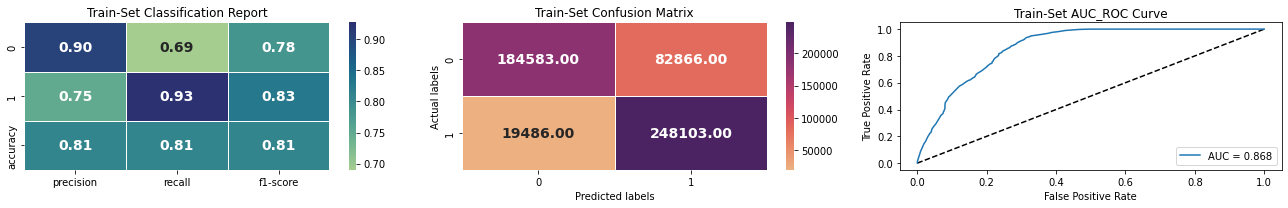

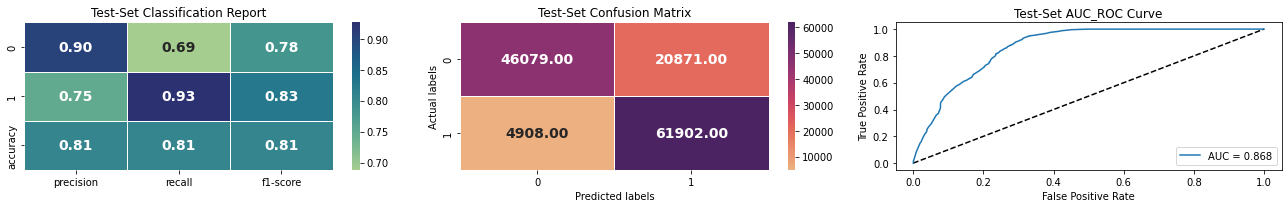

RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

In [56]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier = RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
 from sklearn.svm import SVC

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***